# Este código sirve para crear una serie de carpetas que contienen los archivos de texto originales

Solo agrupa los archivos originales en carpetas nuevas. Los archivos son los .txt de los pesos de las redes de mi experimento de tesis doctoral.   

In [2]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt

In [3]:
#Linux
#path = '/home/yan/datos_redes_tesis_doctorado/Con ITI/2-2(2)-2(1)-1 parcialmente/A = 1, x = 6, 200 En/A/simulation data/Entrenamiento/red-1/Ax+/Acts/10(mot,cr)'
#Windows
path = 'C:/Users/yanoj/OneDrive/Documentos/simulacion/con ITI/datos/Ax/simulacion data/Ax/red-1/Ax/Wgts/11(mot,cr)/Pre1(8,mot,e)'
df = pd.read_csv(path, header =None)
df.head()

,0
0,0.010001
1,0.229217
2,0.339931
3,0.395622
4,0.420597


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       300 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [5]:
df = pd.DataFrame(df) 
df.columns=['Pesos M"1-'+"M'"] 
df.head()

,"Pesos M""1-M'"
0,0.010001
1,0.229217
2,0.339931
3,0.395622
4,0.420597


C:\Users\yanoj\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


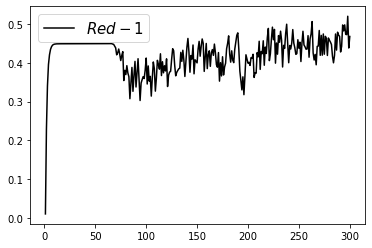

In [6]:
x = np.arange(.99, 300)
plt.errorbar(x, df, color = 'K', label=r'$Red-1$')
plt.legend(fontsize = 15)
plt.show()

In [28]:
#creamos las variables que contienen a la carpeta origen y a la nueva para los datos de entrenamiento
#Linux
#ubicacion_original = "/home/yan/datos_redes_tesis_doctorado/Con ITI/2-2(2)-2(1)-1 parcialmente/A = 1, x = 6, 200 En/"
#ubicacion_nueva = "/home/yan/datos_redes_tesis_doctorado/Con ITI/2-2(2)-2(1)-1 parcialmente/" + "datos_filtrados_entrenamiento"

#Windows--- VERIFICAR RUTA
ubicacion_original = 'C:/Users/yanoj/OneDrive/Documentos/simulacion/con ITI/datos/'
ubicacion_nueva = 'C:/Users/yanoj/OneDrive/Documentos/simulacion/con ITI/'+"datos_filtrados_entrenamiento_PESOS"

if os.path.exists(ubicacion_nueva):
    os.path.exists(ubicacion_original)
else:
    os.mkdir(ubicacion_nueva)

In [29]:
ruta = ubicacion_original
archivo_nuevo = ubicacion_nueva + '/'
datos_TOTAL = pd.DataFrame()
datos_TOTAL_peso2 = pd.DataFrame()

def sorted_aphanumeric(contenido):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(contenido, key=alphanum_key)

#se obtiene una lista desordenada con todos los 
#archivos que están en la ubicación original
contenido = sorted_aphanumeric(os.listdir(ruta))

for elemento in contenido:
    #Linux
    #archivo_original = ruta + elemento + '/simulation data/Entrenamiento/'
    #Windows
    archivo_original = ruta + elemento + '/simulacion data/Ax/' 
    #print(elemento)
    #print('elemento', archivo_original)
    contenido_entrenamiento = sorted_aphanumeric(os.listdir(archivo_original))
    #print(contenido_entrenamiento)
    
    carpeta_nueva = ubicacion_nueva + '/' + elemento 
    carpeta_pesos_u1 = carpeta_nueva + '/Pre1'
    carpeta_pesos_u2 = carpeta_nueva + '/Pre2'
    
    #creamos la nueva carpeta
    if os.path.exists(carpeta_nueva):
        os.path.exists(ubicacion_original)
    else:
        os.mkdir(carpeta_nueva)
        
    if os.path.exists(carpeta_pesos_u1):
        os.path.exists(carpeta_nueva)
    else:
        os.mkdir(carpeta_pesos_u1)
    
    if os.path.exists(carpeta_pesos_u2):
        os.path.exists(carpeta_nueva)
    else:
        os.mkdir(carpeta_pesos_u2) 
    
    for i in contenido_entrenamiento:
        archivo = archivo_original + i + '/Ax/Wgts/11(mot,cr)/Pre1(8,mot,e)'#VERIFICAR UNIDAD
        archivo_peso2 = archivo_original + i + '/Ax/Wgts/11(mot,cr)/Pre2(9,mot,e)'
        #print(archivo)
        datos = pd.read_csv(archivo, sep = ': ', engine='python', keep_default_na=False,
                na_values=[' '])
        
        datos_peso2 = pd.read_csv(archivo_peso2, sep = ': ', engine='python', keep_default_na=False,
                na_values=[' '])
        
        datos_TOTAL = pd.DataFrame(datos)
        datos_TOTAL.columns=[i]
        
        datos_TOTAL_peso2 = pd.DataFrame(datos_peso2)
        datos_TOTAL_peso2.columns=[i]
        
        archivo_nuevo = carpeta_pesos_u1 + '/' + i + '-Pre1'
        file = open(archivo_nuevo, "w")
        for valor in datos_TOTAL[i]:
            a = str(valor)
            file.write(a + os.linesep)
        file.close()
        
        archivo_nuevo_peso2 = carpeta_pesos_u2 + '/' + i + '-Pre2'
        file_peso2 = open(archivo_nuevo_peso2, "w")
        for valor in datos_TOTAL_peso2[i]:
            a = str(valor)
            file_peso2.write(a + os.linesep)
        file_peso2.close()


In [26]:
#creamos las variables que contienen a la carpeta origen y a la nueva para los datos de pruebas A
#Linux
#ubicacion_original = "/home/yan/datos_redes_tesis_doctorado/Con ITI/2-2(2)-2(1)-1 parcialmente/A = 1, x = 6, 200 En/"
#ubicacion_nueva = "/home/yan/datos_redes_tesis_doctorado/Con ITI/2-2(2)-2(1)-1 parcialmente/" + "datos_filtrados_pruebas_A"

#Windows--- VERIFICAR RUTA
ubicacion_original = 'C:/Users/yanoj/OneDrive/Documentos/simulacion/con ITI/datos/'
ubicacion_nueva = 'C:/Users/yanoj/OneDrive/Documentos/simulacion/con ITI/'+"datos_filtrados_pruebas_A_PESOS"

if os.path.exists(ubicacion_nueva):
    os.path.exists(ubicacion_original)
else:
    os.mkdir(ubicacion_nueva)

In [27]:
ruta = ubicacion_original
archivo_nuevo = ubicacion_nueva + '/'
datos_TOTAL = pd.DataFrame()

def sorted_aphanumeric(contenido):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(contenido, key=alphanum_key)

contenido = sorted_aphanumeric(os.listdir(ruta))

for elemento in contenido:
    #Linux
    #archivo_original = ruta + elemento + '/simulation data/A+/'
    #Windows
    archivo_original = ruta + elemento + '/simulacion data/A/'
    print('elemento', archivo_original)
    contenido_entrenamiento = sorted_aphanumeric(os.listdir(archivo_original))
    print(contenido_entrenamiento)
    
    carpeta_nueva = ubicacion_nueva + '/' + elemento
    carpeta_pesos_u1 = carpeta_nueva + '/Pre1'
    carpeta_pesos_u2 = carpeta_nueva + '/Pre2'
    
    #creamos la nueva carpeta
    if os.path.exists(carpeta_nueva):
        os.path.exists(ubicacion_original)
    else:
        os.mkdir(carpeta_nueva)
        
    if os.path.exists(carpeta_pesos_u1):
        os.path.exists(carpeta_nueva)
    else:
        os.mkdir(carpeta_pesos_u1)
    
    if os.path.exists(carpeta_pesos_u2):
        os.path.exists(carpeta_nueva)
    else:
        os.mkdir(carpeta_pesos_u2)        
    
    for i in contenido_entrenamiento:
        archivo = archivo_original + i + '/A/Wgts/11(mot,cr)/Pre1(8,mot,e)'#VERIFICAR UNIDAD
        archivo_peso2 = archivo_original + i + '/A/Wgts/11(mot,cr)/Pre2(9,mot,e)'
        datos = pd.read_csv(archivo, sep = ': ', engine='python', keep_default_na=False,
                na_values=[' '])
        
        datos_peso2 = pd.read_csv(archivo_peso2, sep = ': ', engine='python', keep_default_na=False,
                na_values=[' '])
        
        datos_TOTAL = pd.DataFrame(datos)
        datos_TOTAL.columns=[i]
        
        datos_TOTAL_peso2 = pd.DataFrame(datos_peso2)
        datos_TOTAL_peso2.columns=[i]
        
        archivo_nuevo = carpeta_pesos_u1 + '/' + i + '-Pre1'
        file = open(archivo_nuevo, "w")
        for valor in datos_TOTAL[i]:
            a = str(valor)
            file.write(a + os.linesep)
        file.close()
        
        archivo_nuevo_peso2 = carpeta_pesos_u2 + '/' + i + '-Pre2'
        file_peso2 = open(archivo_nuevo_peso2, "w")
        for valor in datos_TOTAL_peso2[i]:
            a = str(valor)
            file_peso2.write(a + os.linesep)
        file_peso2.close()


elemento C:/Users/yanoj/OneDrive/Documentos/simulacion/con ITI/datos/A/simulacion data/A/
['red-1', 'red-2', 'red-3', 'red-4', 'red-5', 'red-6', 'red-7', 'red-8', 'red-9', 'red-10']
elemento C:/Users/yanoj/OneDrive/Documentos/simulacion/con ITI/datos/A(1)x/simulacion data/A/
['red-1', 'red-2', 'red-3', 'red-4', 'red-5', 'red-6', 'red-7', 'red-8', 'red-9', 'red-10']
elemento C:/Users/yanoj/OneDrive/Documentos/simulacion/con ITI/datos/A(2)x/simulacion data/A/
['red-1', 'red-2', 'red-3', 'red-4', 'red-5', 'red-6', 'red-7', 'red-8', 'red-9', 'red-10']
elemento C:/Users/yanoj/OneDrive/Documentos/simulacion/con ITI/datos/A(4)x/simulacion data/A/
['red-1', 'red-2', 'red-3', 'red-4', 'red-5', 'red-6', 'red-7', 'red-8', 'red-9', 'red-10']
elemento C:/Users/yanoj/OneDrive/Documentos/simulacion/con ITI/datos/Ax/simulacion data/A/
['red-1', 'red-2', 'red-3', 'red-4', 'red-5', 'red-6', 'red-7', 'red-8', 'red-9', 'red-10']
elemento C:/Users/yanoj/OneDrive/Documentos/simulacion/con ITI/datos/x/simula

In [24]:
#creamos las variables que contienen a la carpeta origen y a la nueva para los datos de pruebas x
#ubicacion_original = "/home/yan/datos_redes_tesis_doctorado/Con ITI/2-2(2)-2(1)-1 parcialmente/A = 1, x = 6, 200 En/"
#ubicacion_nueva = "/home/yan/datos_redes_tesis_doctorado/Con ITI/2-2(2)-2(1)-1 parcialmente/" + "datos_filtrados_pruebas_x"

#Windows--- VERIFICAR RUTA
ubicacion_original = 'C:/Users/yanoj/OneDrive/Documentos/simulacion/con ITI/datos/'
ubicacion_nueva = 'C:/Users/yanoj/OneDrive/Documentos/simulacion/con ITI/'+"datos_filtrados_pruebas_x_PESOS"


if os.path.exists(ubicacion_nueva):
    os.path.exists(ubicacion_original)
else:
    os.mkdir(ubicacion_nueva)

In [25]:
ruta = ubicacion_original
archivo_nuevo = ubicacion_nueva + '/'
datos_TOTAL = pd.DataFrame()

def sorted_aphanumeric(contenido):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(contenido, key=alphanum_key)

contenido = sorted_aphanumeric(os.listdir(ruta))

for elemento in contenido:
    #Linux
    #archivo_original = ruta + elemento + '/simulation data/x-/'
    #Windows
    archivo_original = ruta + elemento + '/simulacion data/x/'
    #print('elemento', archivo_original)
    contenido_entrenamiento = sorted_aphanumeric(os.listdir(archivo_original))
   # print(contenido_entrenamiento)
    
    carpeta_nueva = ubicacion_nueva + '/' + elemento
    carpeta_pesos_u1 = carpeta_nueva + '/Pre1'
    carpeta_pesos_u2 = carpeta_nueva + '/Pre2'
    
    #creamos la nueva carpeta
    if os.path.exists(carpeta_nueva):
        os.path.exists(ubicacion_original)
    else:
        os.mkdir(carpeta_nueva)
        
    if os.path.exists(carpeta_pesos_u1):
        os.path.exists(carpeta_nueva)
    else:
        os.mkdir(carpeta_pesos_u1)
    
    if os.path.exists(carpeta_pesos_u2):
        os.path.exists(carpeta_nueva)
    else:
        os.mkdir(carpeta_pesos_u2)        
    
    
    for i in contenido_entrenamiento:
        archivo =  archivo_original + i + '/x/Acts/11(mot,cr)'#VERIFICAR UNIDAD
        archivo_peso2 = archivo_original + i + '/x/Wgts/11(mot,cr)/Pre2(9,mot,e)'
        datos = pd.read_csv(archivo, sep = ': ', engine='python', keep_default_na=False,
                na_values=[' '])
        
        datos_peso2 = pd.read_csv(archivo_peso2, sep = ': ', engine='python', keep_default_na=False,
                na_values=[' '])
        
        datos_TOTAL = pd.DataFrame(datos)
        datos_TOTAL.columns=[i]
        
        datos_TOTAL_peso2 = pd.DataFrame(datos_peso2)
        datos_TOTAL_peso2.columns=[i]
        
        archivo_nuevo = carpeta_pesos_u1 + '/' + i + '-Pre1'
        file = open(archivo_nuevo, "w")
        for valor in datos_TOTAL[i]:
            a = str(valor)
            file.write(a + os.linesep)
        file.close()
        
        archivo_nuevo_peso2 = carpeta_pesos_u2 + '/' + i + '-Pre2'
        file_peso2 = open(archivo_nuevo_peso2, "w")
        for valor in datos_TOTAL_peso2[i]:
            a = str(valor)
            file_peso2.write(a + os.linesep)
        file_peso2.close()
